In [18]:
import os
import numpy as np
import cv2
from PIL import Image as im
from datasets.transforms import TransformFixMatchWafer
from datasets.transforms import MaskedBernoulliNoise, ToWBM
from argparse import Namespace
import albumentations as A

In [19]:
args = Namespace()
args.size_xy = 32
args.proportion = 1.0
args.arch = 'wideresnet'
args.model_depth = 28
args.model_width = 2
args.num_classes  = 8
args.keep = False

In [20]:
out = cv2.imread("data/wm811k/labeled/test/loc/000019.png", cv2.IMREAD_GRAYSCALE)
image = im.fromarray(out)

In [37]:
transform_cutout = A.Compose([
    A.Cutout(num_holes=4, max_h_size=10, max_w_size=10, fill_value=0, p=1.0)
])

transform_noise = A.Compose([
    ToWBM(),
    MaskedBernoulliNoise(noise=0.2)])


# changed!!!
transform_rotate = A.Compose([
    A.Rotate(limit=(-180, 180), interpolation=cv2.INTER_NEAREST, border_mode=cv2.BORDER_CONSTANT, p=1.0)
])

transform_shift = A.Compose([
    A.ShiftScaleRotate(shift_limit=0.5,
                       scale_limit=0,
                       rotate_limit=0,
                       interpolation=cv2.INTER_NEAREST,
                       border_mode=cv2.BORDER_CONSTANT,
                       value=0,
                       p=1.0)])

transform_crop = A.Compose([
    A.RandomResizedCrop(32, 32, scale=(0.5, 0.7), ratio=(0.9,1.1), interpolation=cv2.INTER_NEAREST, p=1.0)
])


transform_optical_distortion = A.Compose([
        A.OpticalDistortion(p=1.0),
    ])


transform_grid_distortion = A.Compose([
        A.GridDistortion(p=1.0),
    ])


transform_elastic = A.Compose([
        A.ElasticTransform(p=1.0),
    ])


self.noise : 0.1


In [38]:
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

def showImagesMatrix(list_images, col=7, wSize=10, hSize=10):
    fig = figure(figsize=(wSize, hSize))
    number_of_files = len(list_images)
    row = int(number_of_files / col)
    # print(number_of_files, row, col)
    if (number_of_files % col != 0):
        row += 1
    for i in range(number_of_files):
        a=fig.add_subplot(row, col, i + 1)
        imshow(list_images[i], cmap='Greys_r')
        axis('off')

In [39]:
image_origin = out
image_cutout = transform_cutout(image=out)['image']
image_crop   = transform_crop(image=out)['image']
image_noise  = ((transform_noise(image=out)['image'] * 255) / 2).astype(np.uint8)
image_rotate = transform_rotate(image=out)['image']
image_shift  = transform_shift(image=out)['image']


# newly added
image_optical_distortion  = transform_optical_distortion(image=out)['image']
image_grid_distortion  = transform_grid_distortion(image=out)['image']
image_elastic  = transform_elastic(image=out)['image']

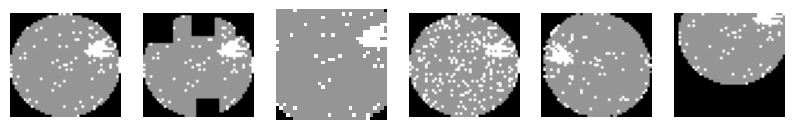

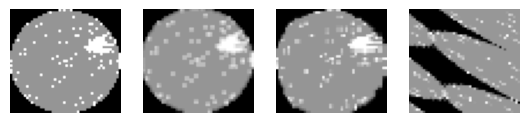

In [40]:
showImagesMatrix([image_origin, image_cutout, image_crop, image_noise, image_rotate, image_shift], col=6)
showImagesMatrix([image_origin, image_optical_distortion, image_grid_distortion, image_elastic], col=6)

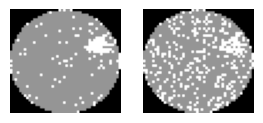

In [17]:
showImagesMatrix([image_origin, image_noise], col=6)


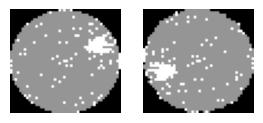

In [9]:
showImagesMatrix([image_origin, image_rotate], col=6)

2 0 6
2 0 6


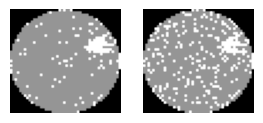

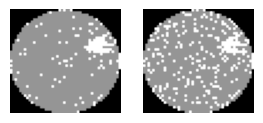

In [139]:
showImagesMatrix([image_origin, image_noise], col=6)
showImagesMatrix([image_origin, image_noise], col=6)


In [140]:
transform_noise = A.Compose([
    ToWBM(),
    MaskedBernoulliNoise(noise=0.2)])

In [96]:
transform_noise

Compose([
  ToWBM(always_apply=True, p=1.0),
  MaskedBernoulliNoise(always_apply=False, p=1.0),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={})

In [98]:
new_transform

Compose([
  OpticalDistortion(always_apply=False, p=0.3, distort_limit=(-0.05, 0.05), shift_limit=(-0.05, 0.05), interpolation=1, border_mode=4, value=None, mask_value=None),
  GridDistortion(always_apply=False, p=0.1, num_steps=5, distort_limit=(-0.3, 0.3), interpolation=1, border_mode=4, value=None, mask_value=None, normalized=False),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={})

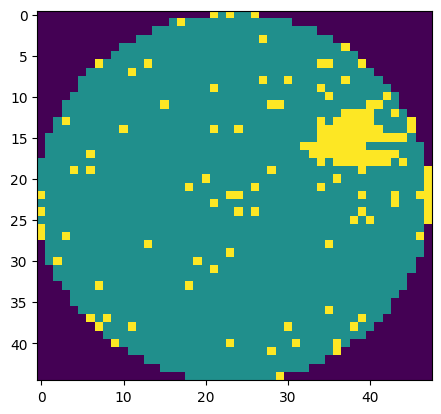

In [100]:
plt.imshow(new_transform(image=out)['image'])